<a href="https://colab.research.google.com/github/TheJoys2019/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Artin%20Sinani%20-%20LS_DS3_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [0]:
!pip install --upgrade seaborn

    100% |████████████████████████████████| 215kB 25.3MB/s 
  Found existing installation: seaborn 0.7.1
    Uninstalling seaborn-0.7.1:
      Successfully uninstalled seaborn-0.7.1


In [0]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 16:27:10--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py’

misleading.py       100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 16:27:10 (155 MB/s) - ‘misleading.py’ saved [1258/1258]



### Fix misleading plot #1

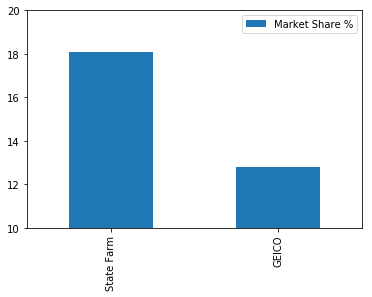

In [0]:
misleading.plot1();

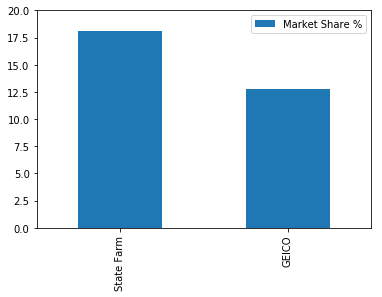

In [0]:
insurance = pd.DataFrame(
index=['State Farm', 'GEICO'],
data={'Market Share %': [18.07,12.79]})

insurance.plot.bar(ylim=(0,20))

### Fix misleading plot #2

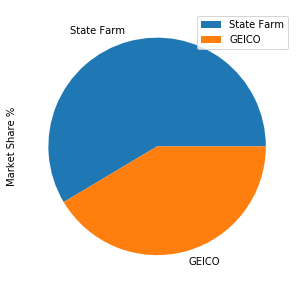

In [0]:
misleading.plot2();

In [0]:
other = pd.DataFrame(
index=['Other'],
data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


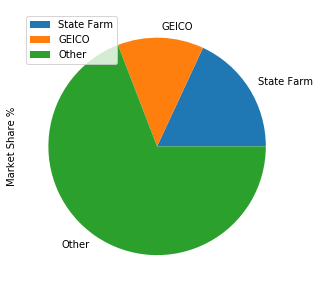

In [0]:
insurance.plot.pie('Market Share %', figsize=(5,5))

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
# import altair as alt
# alt.renderers.enable('notebook')

In [0]:
misleading.plot3()

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm policy premiums',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATH

In [0]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)

In [0]:
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [0]:
(df['State Farm policy premiums'] + df['BERKSHIRE HATHAWAY GRP'] == df['STATE TOTAL']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [0]:
df['State Farm market share %'] = df['State Farm policy premiums'] / df['STATE TOTAL']
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share %
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [0]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  State Farm policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATHA

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [0]:
df.shape

(44, 3)

### See the data

In [0]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
groups = df.groupby('dataset')

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [0]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [0]:
groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [0]:
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [0]:
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [0]:
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

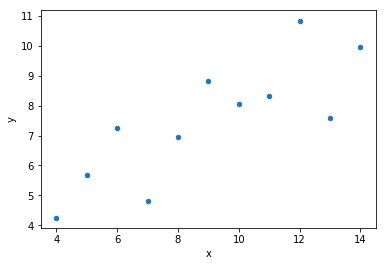

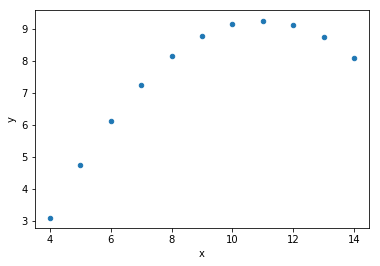

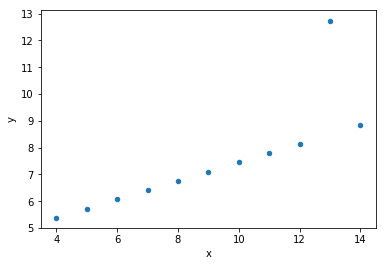

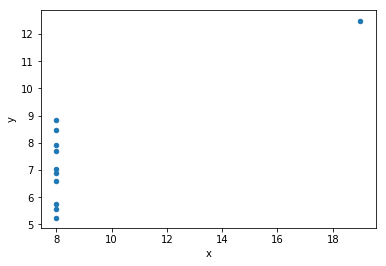

In [0]:
groups.plot('x','y', kind='scatter');

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

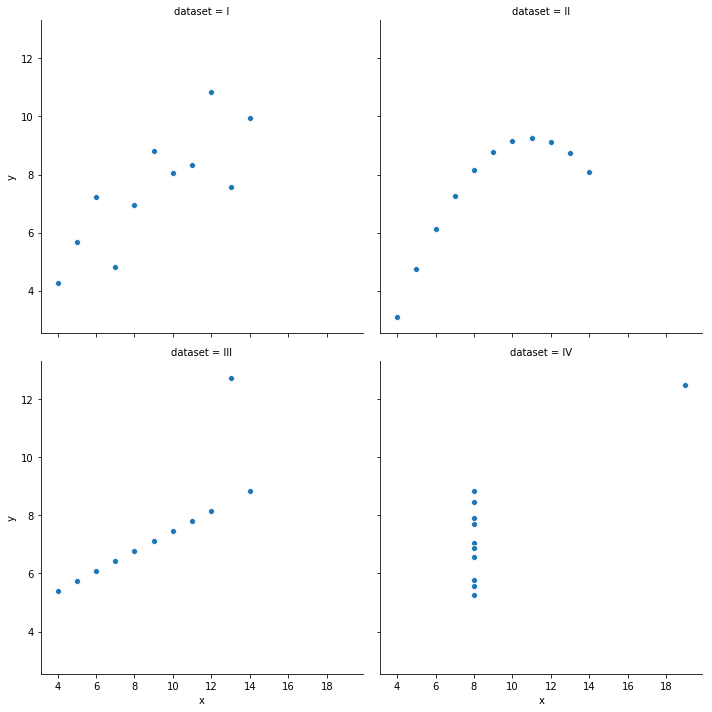

In [0]:
sns.relplot('x','y',col='dataset', data=df, col_wrap=2)

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

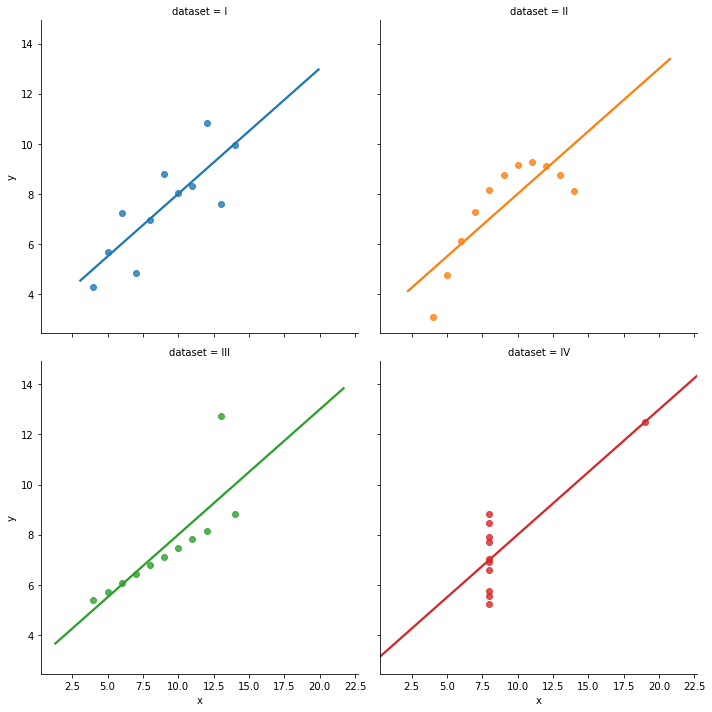

In [0]:
sns.lmplot('x','y',col='dataset', hue='dataset', data=df, col_wrap=2, ci=None)

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [0]:
tips.shape

(244, 7)

### See the first 5 rows

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
# Use binary to make smoker 0 or 1 so we can use describe on it for stats
tips['smoker'] = tips['smoker'].replace({
    'No':0,
    'Yes':1
})

### Describe the data

In [0]:
tips.describe()

,total_bill,tip,smoker,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672
std,8.902412,1.383638,0.486667,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

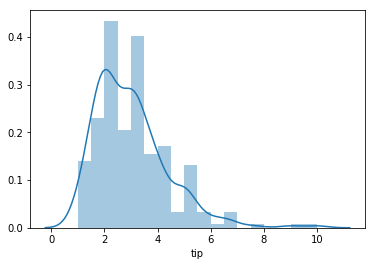

In [0]:
sns.distplot(tips.tip)

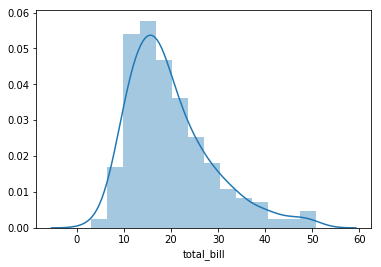

In [0]:
sns.distplot(tips.total_bill)

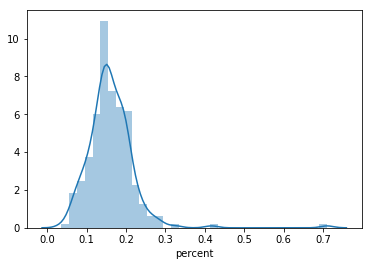

In [0]:
tips['percent'] = tips.tip / tips.total_bill
sns.distplot(tips.percent)

In [0]:
tips['percent'].value_counts(bins=20).sort_index()

(0.034, 0.0694]     6
(0.0694, 0.103]    25
(0.103, 0.137]     42
(0.137, 0.171]     78
(0.171, 0.204]     60
(0.204, 0.238]     20
(0.238, 0.272]      7
(0.272, 0.306]      3
(0.306, 0.339]      1
(0.339, 0.373]      0
(0.373, 0.407]      0
(0.407, 0.44]       1
(0.44, 0.474]       0
(0.474, 0.508]      0
(0.508, 0.542]      0
(0.542, 0.575]      0
(0.575, 0.609]      0
(0.609, 0.643]      0
(0.643, 0.677]      0
(0.677, 0.71]       1
Name: percent, dtype: int64

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

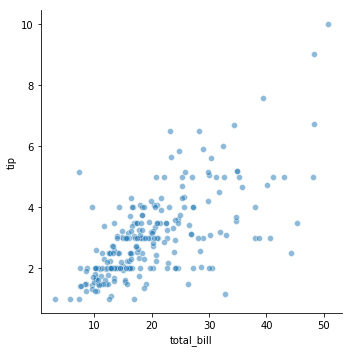

In [0]:
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5)

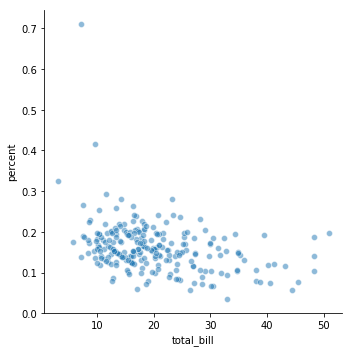

In [0]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5)

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

In [0]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

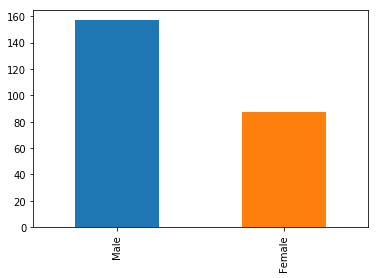

In [0]:
tips.sex.value_counts().plot.bar()

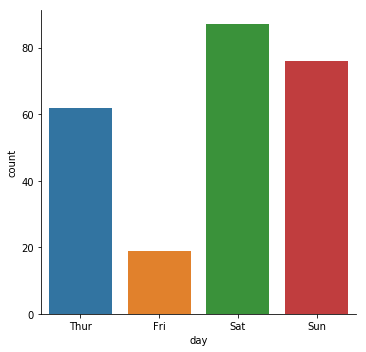

In [0]:
sns.catplot('day', data=tips, kind='count');

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

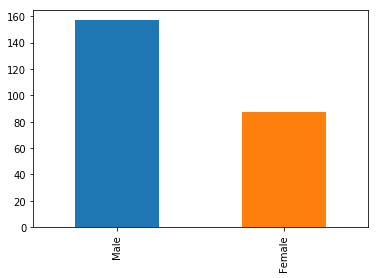

In [0]:
sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=0.5);

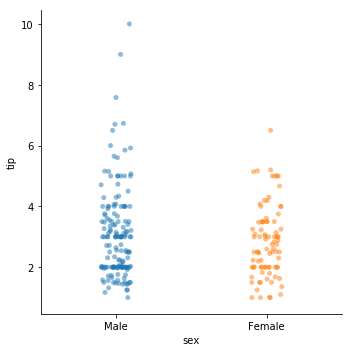

In [0]:
sns.catplot('sex', 'tip', data=tips, kind='strip', alpha=0.5);

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [0]:
flights.shape

(144, 3)

### See the first 5 rows

In [0]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [0]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

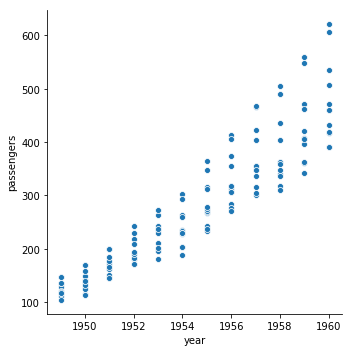

In [0]:
sns.relplot('year', 'passengers', data=flights);

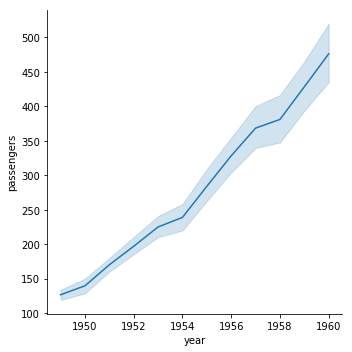

In [0]:
sns.relplot('year','passengers', data=flights, kind='line', ci=95)

### Plot month & passengers

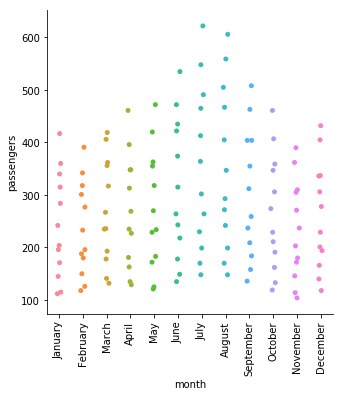

In [0]:
sns.catplot('month', 'passengers', data=flights);
plt.xticks(rotation=90);

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

In [0]:
table = flights.pivot_table('passengers', 'month', 'year')

table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

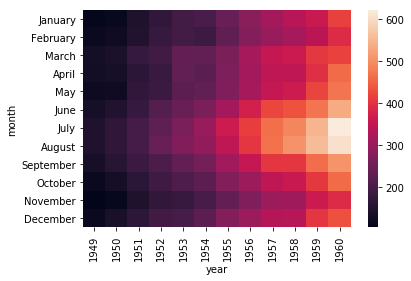

In [0]:
sns.heatmap(table);

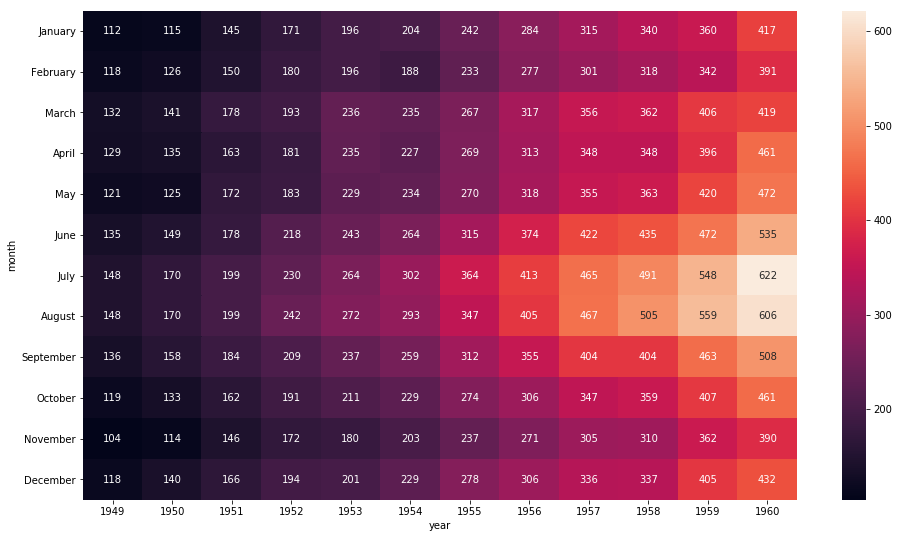

In [0]:
plt.figure(figsize=(16, 9))
sns.heatmap(table, annot=True, fmt='d');

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).



In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-04-02 20:04:35--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-04-02 20:04:35 (153 MB/s) - ‘misleading.py.1’ saved [1258/1258]



### Fixing the Misleading Plot#1
- By Adjusting the Y-axis
- Adding color for differentiation
- Adding 'Other insurers' for better visualization of market share

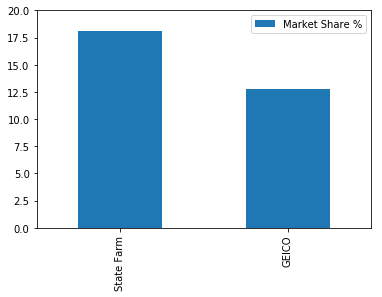

In [0]:
insurance = pd.DataFrame(

index=['State Farm', 'GEICO'],
data={'Market Share %': [18.07, 12.79]})

insurance.plot.bar(ylim=(0,20))

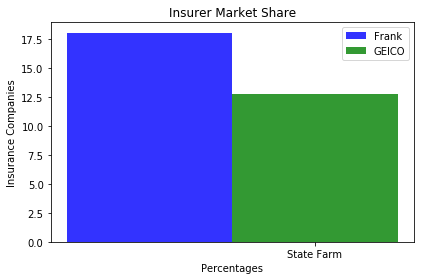

In [0]:
# data to plot
n_groups = 1
stateFarm = (18.07)
geico = (12.79)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.4
opacity = 0.8
 
rects1 = plt.bar(index, stateFarm, bar_width,
alpha=opacity,
color='b',
label='Frank')
 
rects2 = plt.bar(index + bar_width, geico, bar_width,
alpha=opacity,
color='g',
label='GEICO')
 
plt.xlabel('Percentages')
plt.ylabel('Insurance Companies')
plt.title('Insurer Market Share')
plt.xticks(index + bar_width, ('State Farm','Geico'))
plt.legend()
 
plt.tight_layout()
plt.show()

In [0]:
other = pd.DataFrame(
index=['Other'],
data={'Market Share %': [100 - 18.07 - 12.79]})

insurance = insurance.append(other)

insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


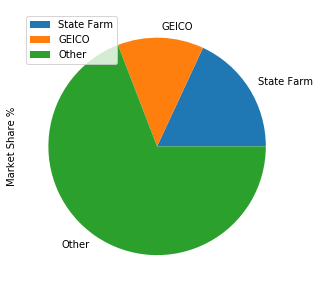

In [0]:
insurance.plot.pie('Market Share %', figsize=(5,5))

## Map of America Insurance Premiums

In [0]:
url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Sprint-02-Storytelling-With-Data/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'
df = pd.read_csv(url)

In [0]:
df.rename(columns={'STATE FARM GRP': 'STATE FARM policy premiums'}, inplace=True)
df.head()

,state,id,STATE FARM policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL
0,Alabama,1,768213,282947,3025561
1,Alaska,2,128613,81366,454623
2,Arizona,4,760003,604049,4373055
3,Arkansas,5,454931,96908,1777917
4,California,6,3655463,2091720,25255501


In [0]:
(df['STATE FARM policy premiums'] + df['BERKSHIRE HATHAWAY GRP'] == df['STATE TOTAL']).head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [0]:
import altair as alt
from vega_datasets import data

states = alt.topo_feature(data.us_10m.url, 'states')
variable = 'State Farm market share %'

alt.Chart(states).mark_geoshape().encode(
    alt.Color(variable, type='quantitative')
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(df, 'id', [variable])
).properties(
    width=500,
    height=300
).project(
    type='albersUsa'
)

Chart({
  data: UrlData({
    format: TopoDataFormat({
      feature: 'states',
      type: 'topojson'
    }),
    url: 'https://vega.github.io/vega-datasets/data/us-10m.json'
  }),
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'State Farm market share %',
      type: 'quantitative'
    })
  }),
  height: 300,
  mark: 'geoshape',
  projection: Projection({
    type: 'albersUsa'
  }),
  transform: [LookupTransform({
    from: LookupData({
      data:                    state  id  STATE FARM policy premiums  \
      0                Alabama   1                      768213   
      1                 Alaska   2                      128613   
      2                Arizona   4                      760003   
      3               Arkansas   5                      454931   
      4             California   6                     3655463   
      5               Colorado   8                      827143   
      6            Connecticut   9                      169773   
      7               Delaware  10                      191319   
      8   District of Columbia  11                       67231   
      9                Florida  12                     2806322   
      10               Georgia  13                     1761224   
      11                Hawaii  15                      133498   
      12                 Idaho  16                      130613   
      13              Illinois  17                     2256543   
      14               Indiana  18                      861382   
      15                  Iowa  19                      368898   
      16                Kansas  20                      351343   
      17              Kentucky  21                      680433   
      18             Louisiana  22                     1415980   
      19                 Maine  23                      101111   
      20              Maryland  24                      883401   
      21         Massachusetts  25                           0   
      22              Michigan  26                     1580398   
      23             Minnesota  27                      851940   
      24           Mississippi  28                      467887   
      25              Missouri  29                      883774   
      26               Montana  30                      156816   
      27              Nebraska  31                      273727   
      28                Nevada  32                      404688   
      29         New Hampshire  33                      103340   
      30            New Jersey  34                      619623   
      31            New Mexico  35                      261922   
      32              New York  36                     1666653   
      33        North Carolina  37                      842368   
      34          North Dakota  38                       67282   
      35                  Ohio  39                     1240075   
      36              Oklahoma  40                      636063   
      37                Oregon  41                      564416   
      38          Pennsylvania  42                     1654528   
      39          Rhode Island  44                           0   
      40        South Carolina  45                      874436   
      41          South Dakota  46                      101912   
      42             Tennessee  47                      889329   
      43                 Texas  48                     3395165   
      44                  Utah  49                      300403   
      45               Vermont  50                       30003   
      46              Virginia  51                      878312   
      47            Washington  53                      794882   
      48         West Virginia  54                      323608   
      49             Wisconsin  55                      443680   
      50               Wyoming  56                       90412   
      51           Puerto Rico  72                           0   
      
          BERKSHIRE HATHA

# Use Seaborn to Visualize Distributions and Relationships w/ Continuous and Discrete Variables

1. Anscombe dataset
2. See the data's shape

In [0]:
df = sns.load_dataset('anscombe')

df.shape

(44, 3)

In [0]:
# See the data
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [0]:
# Group by 'dataset'
groups = df.groupby('dataset')

In [0]:
groups.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

In [0]:
# Get count for each column in each group

groups.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


In [0]:
# Find mean
groups.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


In [0]:
# Let's find standard deviation
groups.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


In [0]:
# Let's find correlation
groups.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

dataset
I      AxesSubplot(0.125,0.125;0.775x0.755)
II     AxesSubplot(0.125,0.125;0.775x0.755)
III    AxesSubplot(0.125,0.125;0.775x0.755)
IV     AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

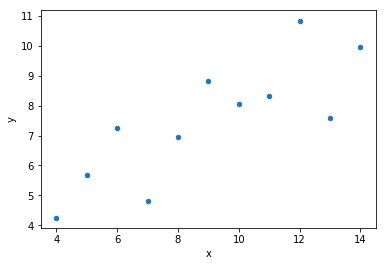

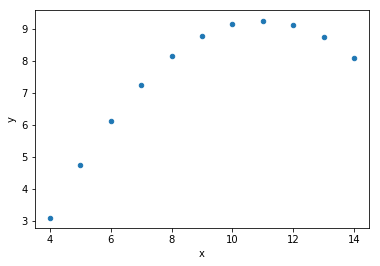

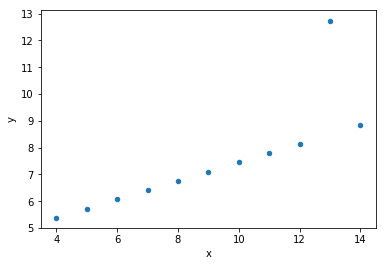

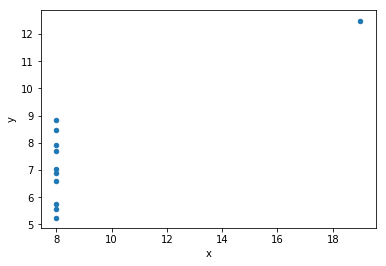

In [0]:
# Use pandas to plot the groups, as scatter plots

groups.plot('x','y', kind='scatter')

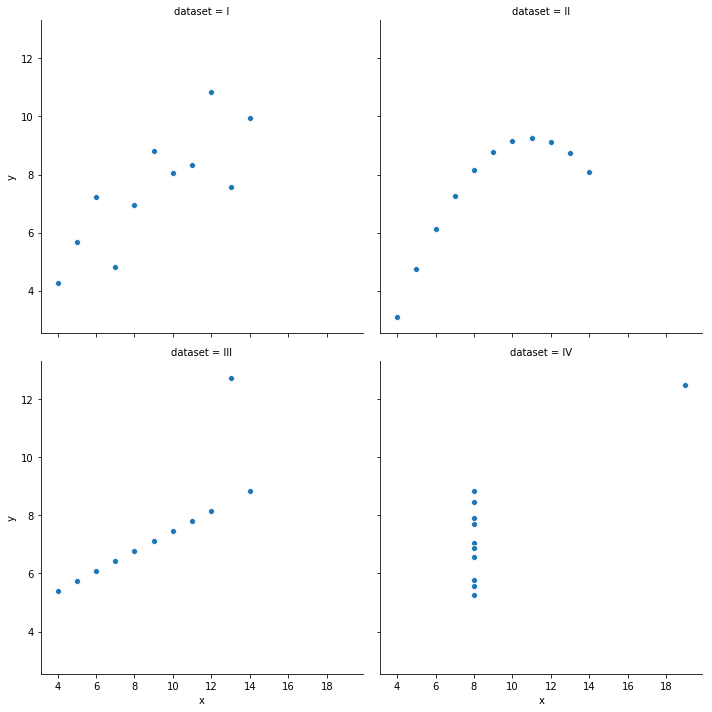

In [0]:
# Use Seaborn to make relational plots

sns.relplot('x','y',col='dataset', data=df, col_wrap=2)

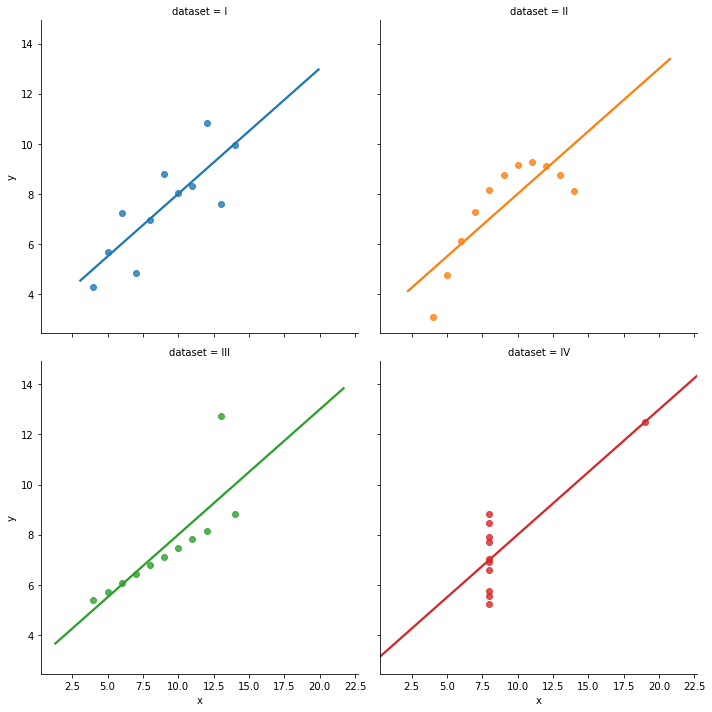

In [0]:
# Use Seaborn to make linear model plots

sns.lmplot('x','y',col='dataset',hue='dataset', data=df, col_wrap=2, ci=None)

## 2. Tips dataset

In [0]:
# Load Data set and find shape
tips = sns.load_dataset('tips')

tips.shape

(244, 7)

In [0]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [0]:
# Make smoker binary (0 or 1) so it shows up in stats (using describe function)

tips['smoker'] = tips['smoker'].replace({
    'No': 0,
    'Yes': 1
})

In [0]:
tips.describe()

,total_bill,tip,smoker,size
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.381148,2.569672
std,8.902412,1.383638,0.486667,0.951100
min,3.070000,1.000000,0.000000,1.000000
25%,13.347500,2.000000,0.000000,2.000000
50%,17.795000,2.900000,0.000000,2.000000
75%,24.127500,3.562500,1.000000,3.000000
max,50.810000,10.000000,1.000000,6.000000


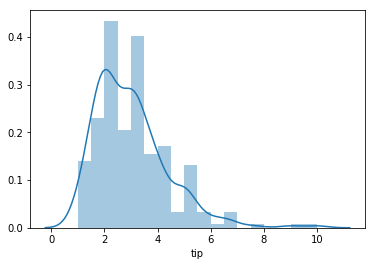

In [0]:
# Making a univariate distribution plot

sns.distplot(tips.tip)

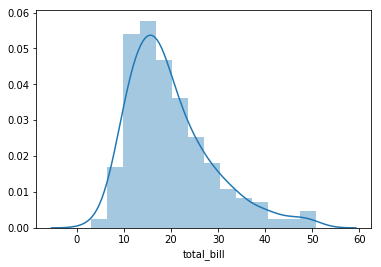

In [0]:
sns.distplot(tips.total_bill)

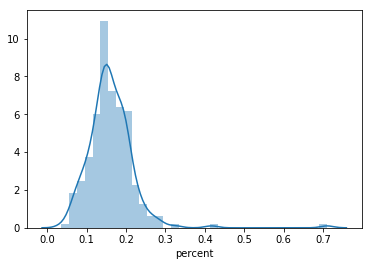

In [0]:
tips['percent'] = tips.tip / tips.total_bill
sns.distplot(tips.percent)

In [0]:
tips['percent'].value_counts(bins=20).sort_index()

(0.034, 0.0694]     6
(0.0694, 0.103]    25
(0.103, 0.137]     42
(0.137, 0.171]     78
(0.171, 0.204]     60
(0.204, 0.238]     20
(0.238, 0.272]      7
(0.272, 0.306]      3
(0.306, 0.339]      1
(0.339, 0.373]      0
(0.373, 0.407]      0
(0.407, 0.44]       1
(0.44, 0.474]       0
(0.474, 0.508]      0
(0.508, 0.542]      0
(0.542, 0.575]      0
(0.575, 0.609]      0
(0.609, 0.643]      0
(0.643, 0.677]      0
(0.677, 0.71]       1
Name: percent, dtype: int64

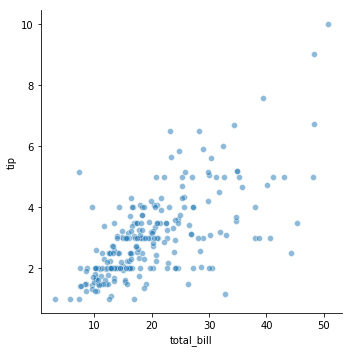

In [0]:
# Make bivariate relational plots
sns.relplot('total_bill', 'tip', data=tips, alpha=0.5)

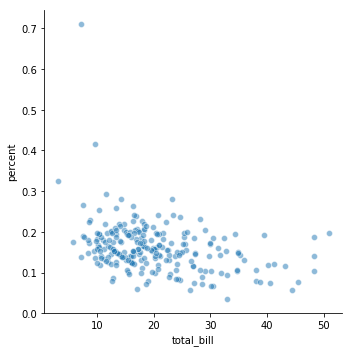

In [0]:
sns.relplot('total_bill', 'percent', data=tips, alpha=0.5)

In [0]:
# Make univariate categorical plots

tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

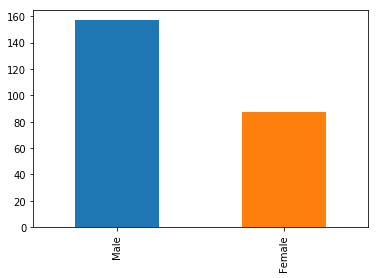

In [0]:
tips.sex.value_counts().plot.bar()

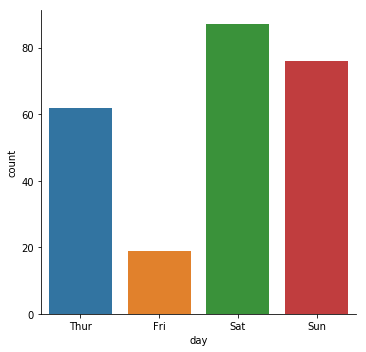

In [0]:
sns.catplot('day', data=tips, kind='count');

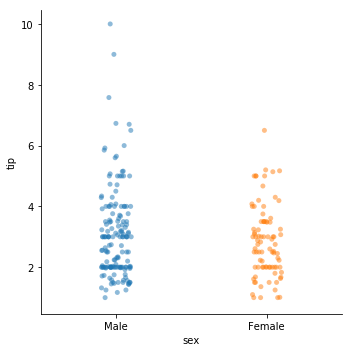

In [0]:
# make bivariate categorical plots

sns.catplot('sex','tip',data=tips,kind='strip', alpha=0.5)

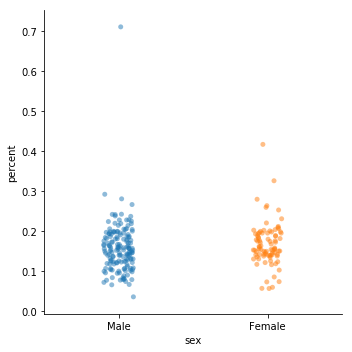

In [0]:
sns.catplot('sex', 'percent', data=tips, kind='strip', alpha=0.5);

## Flights Dataset

In [0]:
flights = sns.load_dataset('flights')

flights.shape

(144, 3)

In [0]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [0]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


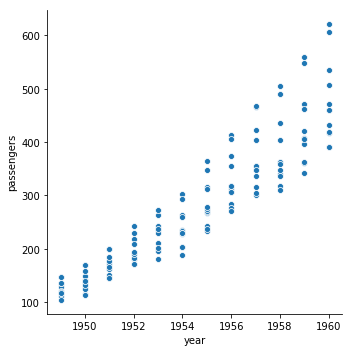

In [0]:
sns.relplot('year','passengers', data=flights);

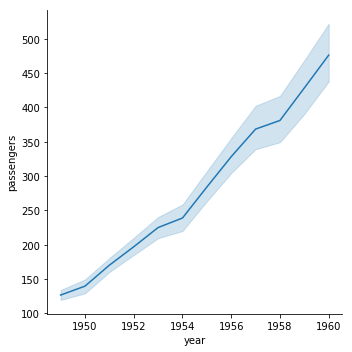

In [0]:
# I think this visual is pretty cool (below)

sns.relplot('year', 'passengers', data=flights, kind='line', ci=95);

Plot month & Passengers

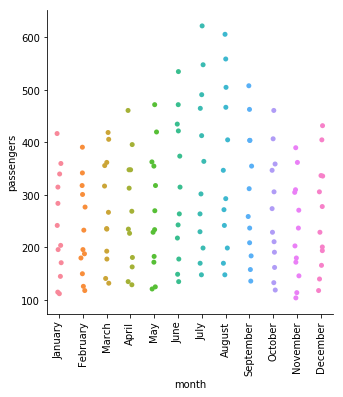

In [0]:
sns.catplot('month','passengers', data=flights)
plt.xticks(rotation=90);

Pivot Table of Passengers by Month and Year

In [0]:
table = flights.pivot_table('passengers', 'month', 'year')

table

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


Create heat map of pivot table above 

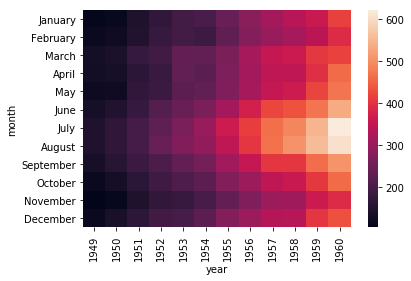

In [0]:
sns.heatmap(table);

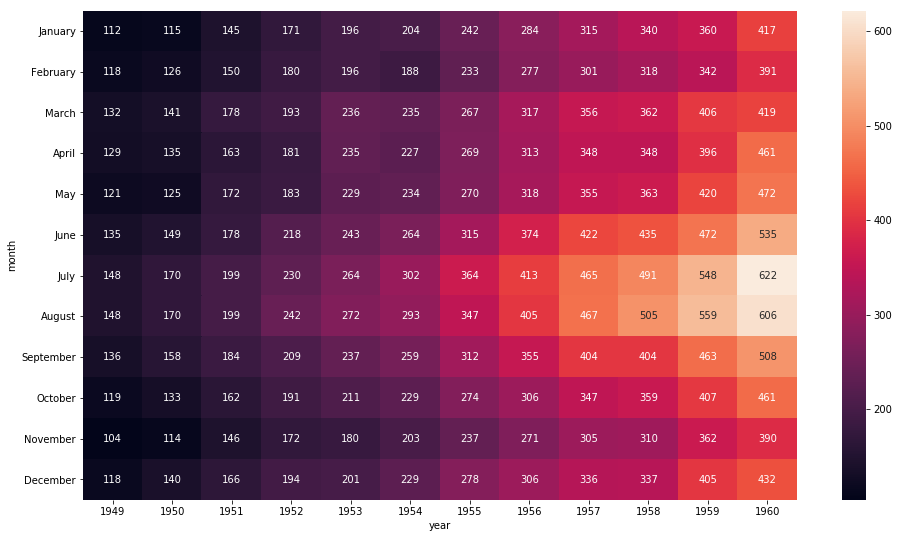

In [0]:
plt.figure(figsize=(16,9))
sns.heatmap(table, annot=True, fmt='d');

### 2.

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [20]:
import pandas as pd
import altair as alt
from vega_datasets import data
df = pd.read_csv('https://query.data.world/s/nmnkmqfh5zwkiojox4nvzytrtsrda4')

df.shape

(37, 3)

In [21]:
df.head()

,Category,iPhone,YOY growth
0,Q2/07,0.141,NaN
1,Q3/07,0.489,NaN
2,Q4/07,1.036,NaN
3,Q1/08,0.817,NaN
4,Q2/08,0.483,242.55


In [22]:
df.describe()

,iPhone,YOY growth
count,37.000000,33.000000
mean,16.949324,99.646667
std,14.129268,163.326071
min,0.141000,-23.340000
25%,4.606000,14.750000
50%,15.821000,56.970000
75%,24.048000,121.360000
max,51.635000,801.020000


In [0]:
df1 = df.fillna(0)

In [24]:
df1.head()

,Category,iPhone,YOY growth
0,Q2/07,0.141,0.00
1,Q3/07,0.489,0.00
2,Q4/07,1.036,0.00
3,Q1/08,0.817,0.00
4,Q2/08,0.483,242.55


In [75]:
df1['Category']

0     Q2/07
1     Q3/07
2     Q4/07
3     Q1/08
4     Q2/08
5     Q3/08
6     Q4/08
7     Q1/09
8     Q2/09
9     Q3/09
10    Q4/09
11    Q1/10
12    Q2/10
13    Q3/10
14    Q4/10
15    Q1/11
16    Q2/11
17    Q3/11
18    Q4/11
19    Q1/12
20    Q2/12
21    Q3/12
22    Q4/12
23    Q1/13
24    Q2/13
25    Q3/13
26    Q4/13
27    Q1/14
28    Q2/14
29    Q3/14
30    Q4/14
31    Q1/15
32    Q2/15
33    Q3/15
34    Q4/15
35    Q1/16
36    Q2/16
Name: Category, dtype: object

In [0]:
chart = alt.Chart(df1)

In [31]:
alt.Chart(df1).mark_point()

Chart({
  data:    Category  iPhone  YOY growth
  0     Q2/07   0.141        0.00
  1     Q3/07   0.489        0.00
  2     Q4/07   1.036        0.00
  3     Q1/08   0.817        0.00
  4     Q2/08   0.483      242.55
  5     Q3/08   4.406      801.02
  6     Q4/08   2.940      183.78
  7     Q1/09   2.427      197.06
  8     Q2/09   3.060      533.54
  9     Q3/09   4.606        4.54
  10    Q4/09   5.578       89.73
  11    Q1/10   5.445      124.35
  12    Q2/10   5.334       74.31
  13    Q3/10   8.822       91.53
  14    Q4/10  10.239       83.56
  15    Q1/11  12.053      121.36
  16    Q2/11  13.102      145.63
  17    Q3/11  10.604       20.20
  18    Q4/11  23.950      133.91
  19    Q1/12  22.276       84.82
  20    Q2/12  15.821       20.75
  21    Q3/12  16.645       56.97
  22    Q4/12  30.660       28.02
  23    Q1/13  22.955        3.05
  24    Q2/13  18.154       14.75
  25    Q3/13  19.510       17.21
  26    Q4/13  32.498        5.99
  27    Q1/14  26.064       13.54
  28    Q2/14  19.751        8.80
  29    Q3/14  23.678       21.36
  30    Q4/14  51.182       57.49
  31    Q1/15  40.282       54.55
  32    Q2/15  31.368       58.82
  33    Q3/15  32.209       36.03
  34    Q4/15  51.635        0.89
  35    Q1/16  32.857      -18.43
  36    Q2/16  24.048      -23.34,
  mark: 'point'
})

In [53]:
alt.Chart(df1).mark_point().encode(
  x='Category',
  y='iPhone',
  
    
)

Chart({
  data:    Category  iPhone  YOY growth
  0     Q2/07   0.141        0.00
  1     Q3/07   0.489        0.00
  2     Q4/07   1.036        0.00
  3     Q1/08   0.817        0.00
  4     Q2/08   0.483      242.55
  5     Q3/08   4.406      801.02
  6     Q4/08   2.940      183.78
  7     Q1/09   2.427      197.06
  8     Q2/09   3.060      533.54
  9     Q3/09   4.606        4.54
  10    Q4/09   5.578       89.73
  11    Q1/10   5.445      124.35
  12    Q2/10   5.334       74.31
  13    Q3/10   8.822       91.53
  14    Q4/10  10.239       83.56
  15    Q1/11  12.053      121.36
  16    Q2/11  13.102      145.63
  17    Q3/11  10.604       20.20
  18    Q4/11  23.950      133.91
  19    Q1/12  22.276       84.82
  20    Q2/12  15.821       20.75
  21    Q3/12  16.645       56.97
  22    Q4/12  30.660       28.02
  23    Q1/13  22.955        3.05
  24    Q2/13  18.154       14.75
  25    Q3/13  19.510       17.21
  26    Q4/13  32.498        5.99
  27    Q1/14  26.064       13.54
  28    Q2/14  19.751        8.80
  29    Q3/14  23.678       21.36
  30    Q4/14  51.182       57.49
  31    Q1/15  40.282       54.55
  32    Q2/15  31.368       58.82
  33    Q3/15  32.209       36.03
  34    Q4/15  51.635        0.89
  35    Q1/16  32.857      -18.43
  36    Q2/16  24.048      -23.34,
  encoding: EncodingWithFacet({
    x: X({
      shorthand: 'Category'
    }),
    y: Y({
      shorthand: 'iPhone'
    })
  }),
  mark: 'point'
})

In [42]:
alt.Chart(df1).mark_bar().encode(
    x="Category",
    y="iPhone",
    color=alt.condition(
        alt.datum.nonfarm_change > 0,
        alt.value("green"),  # The positive color
        alt.value("orange")  # The negative color
    )
).properties(width=600)

Chart({
  data:    Category  iPhone  YOY growth
  0     Q2/07   0.141        0.00
  1     Q3/07   0.489        0.00
  2     Q4/07   1.036        0.00
  3     Q1/08   0.817        0.00
  4     Q2/08   0.483      242.55
  5     Q3/08   4.406      801.02
  6     Q4/08   2.940      183.78
  7     Q1/09   2.427      197.06
  8     Q2/09   3.060      533.54
  9     Q3/09   4.606        4.54
  10    Q4/09   5.578       89.73
  11    Q1/10   5.445      124.35
  12    Q2/10   5.334       74.31
  13    Q3/10   8.822       91.53
  14    Q4/10  10.239       83.56
  15    Q1/11  12.053      121.36
  16    Q2/11  13.102      145.63
  17    Q3/11  10.604       20.20
  18    Q4/11  23.950      133.91
  19    Q1/12  22.276       84.82
  20    Q2/12  15.821       20.75
  21    Q3/12  16.645       56.97
  22    Q4/12  30.660       28.02
  23    Q1/13  22.955        3.05
  24    Q2/13  18.154       14.75
  25    Q3/13  19.510       17.21
  26    Q4/13  32.498        5.99
  27    Q1/14  26.064       13.54
  28    Q2/14  19.751        8.80
  29    Q3/14  23.678       21.36
  30    Q4/14  51.182       57.49
  31    Q1/15  40.282       54.55
  32    Q2/15  31.368       58.82
  33    Q3/15  32.209       36.03
  34    Q4/15  51.635        0.89
  35    Q1/16  32.857      -18.43
  36    Q2/16  24.048      -23.34,
  encoding: EncodingWithFacet({
    color: ColorValue({
      condition: ColorValue({
        test: (datum.nonfarm_change > 0),
        value: 'green'
      }),
      value: 'orange'
    }),
    x: X({
      shorthand: 'Category'
    }),
    y: Y({
      shorthand: 'iPhone'
    })
  }),
  mark: 'bar',
  width: 600
})

In [65]:
base = alt.Chart(df1).mark_bar().encode(
    alt.Y('iPhone:Q', title='iPhone sales (in millions) by Quarter/Year')
).properties(
    width=200,
    height=200
)

alt.hconcat(
    base.encode(x='Category').properties(title='iPhone=quantitative'))


HConcatChart({
  hconcat: [Chart({
    data:    Category  iPhone  YOY growth
    0     Q2/07   0.141        0.00
    1     Q3/07   0.489        0.00
    2     Q4/07   1.036        0.00
    3     Q1/08   0.817        0.00
    4     Q2/08   0.483      242.55
    5     Q3/08   4.406      801.02
    6     Q4/08   2.940      183.78
    7     Q1/09   2.427      197.06
    8     Q2/09   3.060      533.54
    9     Q3/09   4.606        4.54
    10    Q4/09   5.578       89.73
    11    Q1/10   5.445      124.35
    12    Q2/10   5.334       74.31
    13    Q3/10   8.822       91.53
    14    Q4/10  10.239       83.56
    15    Q1/11  12.053      121.36
    16    Q2/11  13.102      145.63
    17    Q3/11  10.604       20.20
    18    Q4/11  23.950      133.91
    19    Q1/12  22.276       84.82
    20    Q2/12  15.821       20.75
    21    Q3/12  16.645       56.97
    22    Q4/12  30.660       28.02
    23    Q1/13  22.955        3.05
    24    Q2/13  18.154       14.75
    25    Q3/13  19.510       17.21
    26    Q4/13  32.498        5.99
    27    Q1/14  26.064       13.54
    28    Q2/14  19.751        8.80
    29    Q3/14  23.678       21.36
    30    Q4/14  51.182       57.49
    31    Q1/15  40.282       54.55
    32    Q2/15  31.368       58.82
    33    Q3/15  32.209       36.03
    34    Q4/15  51.635        0.89
    35    Q1/16  32.857      -18.43
    36    Q2/16  24.048      -23.34,
    encoding: EncodingWithFacet({
      x: X({
        shorthand: 'Category'
      }),
      y: Y({
        shorthand: 'iPhone:Q',
        title: 'iPhone sales (in millions) by Quarter/Year'
      })
    }),
    height: 200,
    mark: 'bar',
    title: 'iPhone=quantitative',
    width: 200
  })]
})

In [67]:
base.encode(
    alt.X('Category',
        scale=alt.Scale(zero=False)
    )
)


Chart({
  data:    Category  iPhone  YOY growth
  0     Q2/07   0.141        0.00
  1     Q3/07   0.489        0.00
  2     Q4/07   1.036        0.00
  3     Q1/08   0.817        0.00
  4     Q2/08   0.483      242.55
  5     Q3/08   4.406      801.02
  6     Q4/08   2.940      183.78
  7     Q1/09   2.427      197.06
  8     Q2/09   3.060      533.54
  9     Q3/09   4.606        4.54
  10    Q4/09   5.578       89.73
  11    Q1/10   5.445      124.35
  12    Q2/10   5.334       74.31
  13    Q3/10   8.822       91.53
  14    Q4/10  10.239       83.56
  15    Q1/11  12.053      121.36
  16    Q2/11  13.102      145.63
  17    Q3/11  10.604       20.20
  18    Q4/11  23.950      133.91
  19    Q1/12  22.276       84.82
  20    Q2/12  15.821       20.75
  21    Q3/12  16.645       56.97
  22    Q4/12  30.660       28.02
  23    Q1/13  22.955        3.05
  24    Q2/13  18.154       14.75
  25    Q3/13  19.510       17.21
  26    Q4/13  32.498        5.99
  27    Q1/14  26.064       13.54
  28    Q2/14  19.751        8.80
  29    Q3/14  23.678       21.36
  30    Q4/14  51.182       57.49
  31    Q1/15  40.282       54.55
  32    Q2/15  31.368       58.82
  33    Q3/15  32.209       36.03
  34    Q4/15  51.635        0.89
  35    Q1/16  32.857      -18.43
  36    Q2/16  24.048      -23.34,
  encoding: EncodingWithFacet({
    x: X({
      scale: Scale({
        zero: False
      }),
      shorthand: 'Category'
    }),
    y: Y({
      shorthand: 'iPhone:Q',
      title: 'iPhone sales (in millions) by Quarter/Year'
    })
  }),
  height: 200,
  mark: 'bar',
  width: 200
})

In [72]:
alt.Chart(df1).mark_circle().encode(
    alt.X('Category', bin=True),
    alt.Y('YOY Growth:O', bin=True),
    size='count()',
    color='iPhone:O'
)

Chart({
  data:    Category  iPhone  YOY growth
  0     Q2/07   0.141        0.00
  1     Q3/07   0.489        0.00
  2     Q4/07   1.036        0.00
  3     Q1/08   0.817        0.00
  4     Q2/08   0.483      242.55
  5     Q3/08   4.406      801.02
  6     Q4/08   2.940      183.78
  7     Q1/09   2.427      197.06
  8     Q2/09   3.060      533.54
  9     Q3/09   4.606        4.54
  10    Q4/09   5.578       89.73
  11    Q1/10   5.445      124.35
  12    Q2/10   5.334       74.31
  13    Q3/10   8.822       91.53
  14    Q4/10  10.239       83.56
  15    Q1/11  12.053      121.36
  16    Q2/11  13.102      145.63
  17    Q3/11  10.604       20.20
  18    Q4/11  23.950      133.91
  19    Q1/12  22.276       84.82
  20    Q2/12  15.821       20.75
  21    Q3/12  16.645       56.97
  22    Q4/12  30.660       28.02
  23    Q1/13  22.955        3.05
  24    Q2/13  18.154       14.75
  25    Q3/13  19.510       17.21
  26    Q4/13  32.498        5.99
  27    Q1/14  26.064       13.54
  28    Q2/14  19.751        8.80
  29    Q3/14  23.678       21.36
  30    Q4/14  51.182       57.49
  31    Q1/15  40.282       54.55
  32    Q2/15  31.368       58.82
  33    Q3/15  32.209       36.03
  34    Q4/15  51.635        0.89
  35    Q1/16  32.857      -18.43
  36    Q2/16  24.048      -23.34,
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'iPhone:O'
    }),
    size: Size({
      shorthand: 'count()'
    }),
    x: X({
      bin: True,
      shorthand: 'Category'
    }),
    y: Y({
      bin: True,
      shorthand: 'YOY Growth:O'
    })
  }),
  mark: 'circle'
})

In [74]:
alt.Chart(df1).mark_area().encode(
    x='Category:N',
    y='iPhone:Q',
    color='YOY Growth:N',
    order=alt.Order("iPhone", sort="ascending")
)

Chart({
  data:    Category  iPhone  YOY growth
  0     Q2/07   0.141        0.00
  1     Q3/07   0.489        0.00
  2     Q4/07   1.036        0.00
  3     Q1/08   0.817        0.00
  4     Q2/08   0.483      242.55
  5     Q3/08   4.406      801.02
  6     Q4/08   2.940      183.78
  7     Q1/09   2.427      197.06
  8     Q2/09   3.060      533.54
  9     Q3/09   4.606        4.54
  10    Q4/09   5.578       89.73
  11    Q1/10   5.445      124.35
  12    Q2/10   5.334       74.31
  13    Q3/10   8.822       91.53
  14    Q4/10  10.239       83.56
  15    Q1/11  12.053      121.36
  16    Q2/11  13.102      145.63
  17    Q3/11  10.604       20.20
  18    Q4/11  23.950      133.91
  19    Q1/12  22.276       84.82
  20    Q2/12  15.821       20.75
  21    Q3/12  16.645       56.97
  22    Q4/12  30.660       28.02
  23    Q1/13  22.955        3.05
  24    Q2/13  18.154       14.75
  25    Q3/13  19.510       17.21
  26    Q4/13  32.498        5.99
  27    Q1/14  26.064       13.54
  28    Q2/14  19.751        8.80
  29    Q3/14  23.678       21.36
  30    Q4/14  51.182       57.49
  31    Q1/15  40.282       54.55
  32    Q2/15  31.368       58.82
  33    Q3/15  32.209       36.03
  34    Q4/15  51.635        0.89
  35    Q1/16  32.857      -18.43
  36    Q2/16  24.048      -23.34,
  encoding: EncodingWithFacet({
    color: Color({
      shorthand: 'YOY Growth:N'
    }),
    order: Order({
      shorthand: 'iPhone',
      sort: 'ascending'
    }),
    x: X({
      shorthand: 'Category:N'
    }),
    y: Y({
      shorthand: 'iPhone:Q'
    })
  }),
  mark: 'area'
})

In [0]:
›

## TESLA AUTOPILOT DATA

In [131]:
tesla = pd.read_csv('https://raw.githubusercontent.com/TheJoys2019/DS-Unit-1-Sprint-3-Data-Storytelling/master/tesla_vehicles.csv')

tesla.head()

,Year,Quarter,Months,Total Vehicles,New Vehicles,Roadster,Model S,Model X,Model 3,Autopilot Hardware
0,2008,2,Apr-Jun,3,3,3.0,NaN,NaN,NaN,0
1,2008,3,Jul-Sep,30,27,27.0,NaN,NaN,NaN,0
2,2008,4,Oct-Dec,100,70,70.0,NaN,NaN,NaN,0
3,2009,1,Jan-Mar,320,220,220.0,NaN,NaN,NaN,0
4,2009,2,Apr-Jun,500,180,180.0,NaN,NaN,NaN,0


In [134]:
tesla.shape

(42, 10)

In [135]:
tesla.head(42)

,Year,Quarter,Months,Total Vehicles,New Vehicles,Roadster,Model S,Model X,Model 3,Autopilot Hardware
0,2008,2,Apr-Jun,3,3,3.0,NaN,NaN,NaN,0
1,2008,3,Jul-Sep,30,27,27.0,NaN,NaN,NaN,0
2,2008,4,Oct-Dec,100,70,70.0,NaN,NaN,NaN,0
3,2009,1,Jan-Mar,320,220,220.0,NaN,NaN,NaN,0
4,2009,2,Apr-Jun,500,180,180.0,NaN,NaN,NaN,0
5,2009,3,Jul-Sep,700,200,200.0,NaN,NaN,NaN,0
6,2009,4,Oct-Dec,1000,300,300.0,NaN,NaN,NaN,0
7,2010,1,Jan-Mar,1100,100,100.0,NaN,NaN,NaN,0
8,2010,2,Apr-Jun,1200,100,100.0,NaN,NaN,NaN,0
9,2010,3,Jul-Sep,1300,100,100.0,NaN,NaN,NaN,0


In [0]:
elon = tesla.fillna(0)

In [0]:
chart1 = alt.Chart(elon)

In [138]:
alt.Chart(elon).mark_area().encode(
    x='Model S:Q',
    y='Year:O',
    color='New Vehicles:N',
    order=alt.Order("New Vehicles", sort="ascending"))

Chart({
  data:     Year  Quarter   Months  Total Vehicles  New Vehicles  Roadster  Model S  \
  0   2008        2  Apr-Jun               3             3       3.0      0.0   
  1   2008        3  Jul-Sep              30            27      27.0      0.0   
  2   2008        4  Oct-Dec             100            70      70.0      0.0   
  3   2009        1  Jan-Mar             320           220     220.0      0.0   
  4   2009        2  Apr-Jun             500           180     180.0      0.0   
  5   2009        3  Jul-Sep             700           200     200.0      0.0   
  6   2009        4  Oct-Dec            1000           300     300.0      0.0   
  7   2010        1  Jan-Mar            1100           100     100.0      0.0   
  8   2010        2  Apr-Jun            1200           100     100.0      0.0   
  9   2010        3  Jul-Sep            1300           100     100.0      0.0   
  10  2010        4  Oct-Dec            1400           100     100.0      0.0   
  11  2011        1  Jan-Mar            1598           198     198.0      0.0   
  12  2011        2  Apr-Jun            1796           198     198.0      0.0   
  13  2011        3  Jul-Sep            1994           198     198.0      0.0   
  14  2011        4  Oct-Dec            2194           200     200.0      0.0   
  15  2012        1  Jan-Mar            2293            99      99.0      0.0   
  16  2012        2  Apr-Jun            2382            89      89.0      0.0   
  17  2012        3  Jul-Sep            2703           321      68.0    253.0   
  18  2012        4  Oct-Dec            5103          2400       0.0   2400.0   
  19  2013        1  Jan-Mar           10003          4900       0.0   4900.0   
  20  2013        2  Apr-Jun           15153          5150       0.0   5150.0   
  21  2013        3  Jul-Sep           20653          5500       0.0   5500.0   
  22  2013        4  Oct-Dec           27545          6892       0.0   6892.0   
  23  2014        1  Jan-Mar           34002          6457       0.0   6457.0   
  24  2014        2  Apr-Jun           41581          7579       0.0   7579.0   
  25  2014        3  Jul-Sep           49366          7785       0.0   7785.0   
  26  2014        4  Oct-Dec           59200          9834       0.0   9834.0   
  27  2015        1  Jan-Mar           69245         10045       0.0  10045.0   
  28  2015        2  Apr-Jun           80777         11532       0.0  11532.0   
  29  2015        3  Jul-Sep           92380         11603       0.0  11603.0   
  30  2015        4  Oct-Dec          109858         17478       0.0  17272.0   
  31  2016        1  Jan-Mar          124668         14810       0.0      0.0   
  32  2016        2  Apr-Jun          139070         14402       0.0   9764.0   
  33  2016        3  Jul-Sep          163891         24821       0.0  16047.0   
  34  2016        4  Oct-Dec          186143         22252       0.0      0.0   
  35  2017        1  Jan-Mar          211194         25051       0.0      0.0   
  36  2017        2  Apr-Jun          233220         22026       0.0      0.0   
  37  2017        3  Jul-Sep          259357         26137       0.0      0.0   
  38  2017        4  Oct-Dec          289324         29967       0.0      0.0   
  39  2018        1  Jan-Mar          319321         29997       0.0      0.0   
  40  2018        2  Apr-Jun          360061         40740       0.0  10930.0   
  41  2018        3  Jul-Sep          443561         83500       0.0  14470.0   
  
      Model X  Model 3  Autopilot Hardware  
  0       0.0      0.0                   0  
  1       0.0      0.0                   0  
  2       0.0      0.0                   0  
  3       0.0      0.0                   0  
  4       0.0      0.0                   0  
  5       0.0      0.0                   0  
  6       0.0      0.0                   0  
  7       0.0      0.0                   0  
  8       0.0      0.0                   0  
  9       0.0      0.0                   0  
  10 

In [141]:
elonMu = elon.pivot_table('Model S', 'Months', 'Year')

elonMu

Year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Months,,,,,,,,,,,
Apr-Jun,0.0,0.0,0.0,0.0,0.0,5150.0,7579.0,11532.0,9764.0,0.0,10930.0
Jan-Mar,NaN,0.0,0.0,0.0,0.0,4900.0,6457.0,10045.0,0.0,0.0,0.0
Jul-Sep,0.0,0.0,0.0,0.0,253.0,5500.0,7785.0,11603.0,16047.0,0.0,14470.0
Oct-Dec,0.0,0.0,0.0,0.0,2400.0,6892.0,9834.0,17272.0,0.0,0.0,NaN
